# MNIST + PCA
---
- Feature : 784개 => PCA사용하여 주요 feature만 압축

In [147]:
# 모듈 로딩
from keras.datasets.mnist import load_data
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

### [1] 데이터 로딩

In [148]:
# 데이터 로딩
(x_train, y_train), (x_test, y_test) = load_data()
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

### [2] 데이터 전처리

In [149]:
# data 0 ~ 1사이로 스케일링
x_train = x_train / 255.0
x_test = x_test / 255.0

### [3] MNIST의 PC수 찾기

In [150]:
# PCA하기 위해 2차원으로 reshape
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [151]:
# 98% 비율로 PCA
pca = PCA(n_components=0.98)
pca.fit(x_train)
mnistPCA = pca.transform(x_train)

In [152]:
# 70% 비율로 PCA
pca_70 = PCA(n_components=0.70)
pca_70.fit(x_train)
mnistPCA_70 = pca_70.transform(x_train)

In [153]:
# PCA 데이터 확인
print(pca.singular_values_[:5])
print(pca.explained_variance_[:5])
print(pca.explained_variance_ratio_[:5])

[554.08236184 473.79289646 441.76832659 412.90967564 392.45954891]
[5.11687301 3.74139084 3.25270845 2.8416207  2.56711774]
[0.09704664 0.07095924 0.06169089 0.05389419 0.04868797]


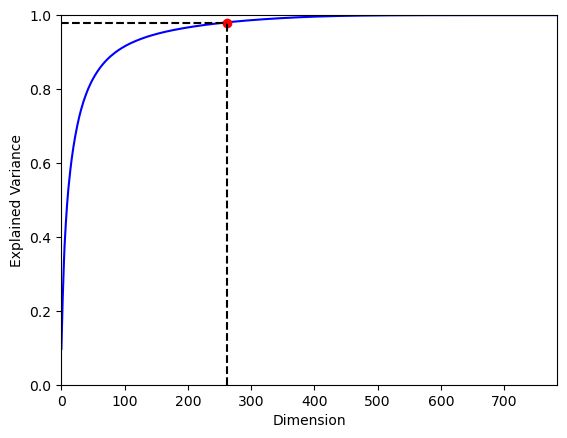

In [154]:
# 주성분과 데이터 투영 분산 저정도 시각화
pca_temp = PCA()
pca_temp.fit(x_train)
cumsum = np.cumsum(pca_temp.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.98) + 1

plt.plot(cumsum, 'b-')
plt.plot(dim, 0.98, 'ro')
plt.plot([261.0, 261.0], [0, 0.98], 'k--')
plt.plot([0, 261.0], [0.98, 0.98], 'k--')
plt.axis([0, 784, 0, 1])
plt.xlabel('Dimension')
plt.ylabel('Explained Variance')
plt.show()

### [4] PCA 이전/이후 이미지 비교

In [155]:
# PCA 복원
re = pca.inverse_transform(mnistPCA)
re_70 = pca_70.inverse_transform(mnistPCA_70)
re.shape, re_70.shape

((60000, 784), (60000, 784))

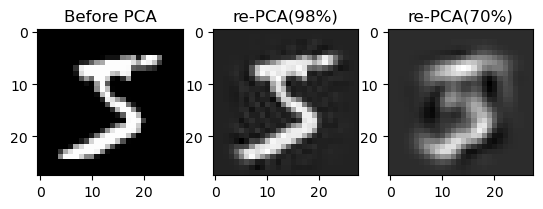

<Figure size 1000x1000 with 0 Axes>

In [159]:
# imshow로 시각화
f, axes = plt.subplots(1, 3)
fig = plt.figure(figsize=(10, 10))
axes[0].set_title('Before PCA')
axes[0].imshow(x_train[0].reshape(28, 28), cmap='gray')
axes[1].set_title('re-PCA(98%)')
axes[1].imshow(re[0].reshape(28, 28), cmap='gray')
axes[2].set_title('re-PCA(70%)')
axes[2].imshow(re_70[0].reshape(28, 28), cmap='gray')
plt.show()